<a href="https://colab.research.google.com/github/harshithareddy2929/FMML_Project_and_Labs/blob/main/lab_1_module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8055555555555556


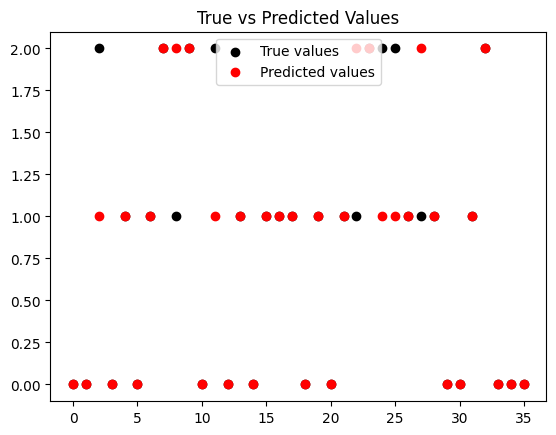

In [1]:
#Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Sonar dataset
sonar_data = datasets.load_wine()
X, y = sonar_data.data, sonar_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot errors
plt.scatter(range(len(y_test)), y_test, color='black', label='True values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


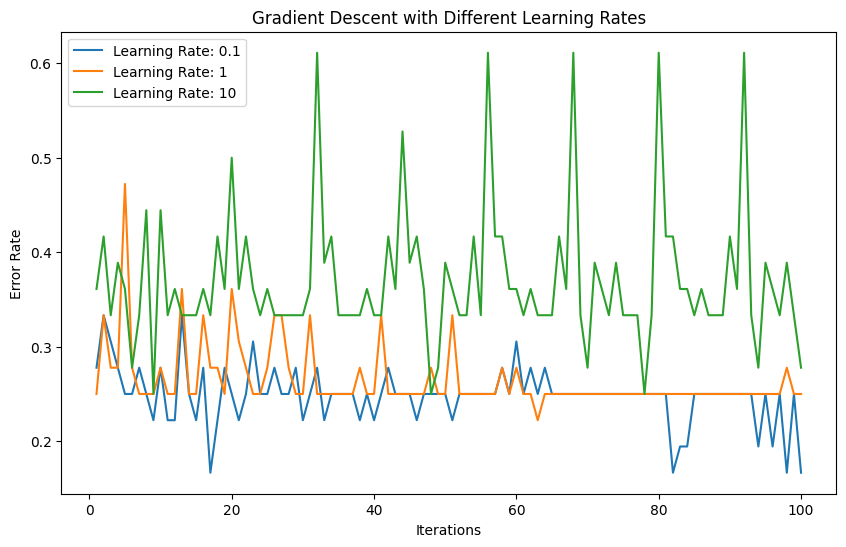

In [2]:
#Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

def gradient_descent(X, y, learning_rate, max_iterations):
    clf = SGDClassifier(learning_rate='constant', eta0=learning_rate, max_iter=max_iterations, random_state=42)
    clf.fit(X, y)

    errors = []

    for iteration in range(max_iterations):
        clf.partial_fit(X, y, classes=np.unique(y))
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        errors.append(1 - accuracy)

    return errors

# Load the Sonar dataset
sonar_data = datasets.load_wine()
X, y = sonar_data.data, sonar_data.target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different learning rates
learning_rates = [0.1, 1, 10]
max_iterations = 100

plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    errors = gradient_descent(X_train, y_train, learning_rate, max_iterations)
    plt.plot(range(1, max_iterations + 1), errors, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.title('Gradient Descent with Different Learning Rates')
plt.legend()
plt.show()


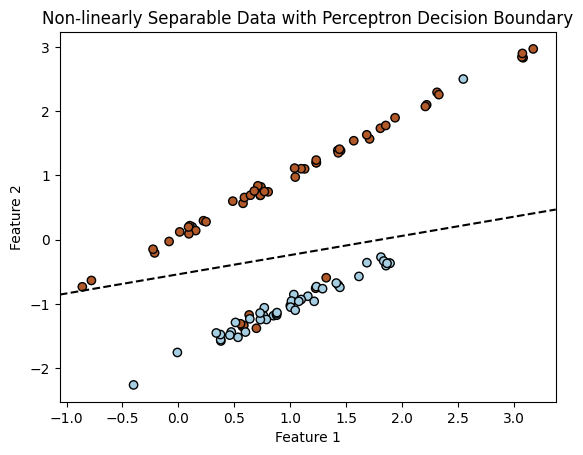

Accuracy: 0.9


In [3]:
#Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a non-linearly separable toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0, random_state=42)

# Change some labels to make the dataset non-linearly separable
y[:10] = 1 - y[:10]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the perceptron
perceptron = Perceptron(max_iter=100, random_state=42)

# Train the perceptron
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Plot the decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Non-linearly Separable Data with Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['--'])

plt.show()

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
